In [2]:
import pandas as pd
import seaborn as sb
import sklearn as skl
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.DataFrame()

for year in range(2015, 2024):
    filename = f'WHR_{year}.csv'  
    data = pd.read_csv(filename)  
    data['year'] = year
    df = pd.concat([df, data], ignore_index=True)


In [4]:
df.describe()

,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,year
count,1367.000000,1367.000000,1367.000000,1366.000000,1367.000000,1367.000000,1366.000000,1367.000000
mean,5.441086,1.019422,1.045334,0.584043,0.450771,0.196260,0.132275,2018.903438
std,1.117909,0.453703,0.331163,0.245117,0.156733,0.113301,0.112555,2.561006
min,1.859000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2015.000000
25%,4.599500,0.696326,0.832022,0.402301,0.356000,0.115000,0.056826,2017.000000
50%,5.440000,1.043000,1.083000,0.612830,0.467610,0.182700,0.097000,2019.000000
75%,6.256300,1.338473,1.299985,0.777614,0.568685,0.252858,0.165945,2021.000000
max,7.842000,2.209000,1.644000,1.141000,0.772000,0.838075,0.587000,2023.000000


In [11]:
df['generosity'].value_counts()

0.000000    9
0.153000    9
0.134000    8
0.120000    8
0.175000    8
           ..
0.175170    1
0.483970    1
0.202900    1
0.362012    1
0.021000    1
Name: generosity, Length: 914, dtype: int64

In [ ]:
df.isnull().sum()

country                         0
region                          0
happiness_score                 0
gdp_per_capita                  0
social_support                  0
healthy_life_expectancy         1
freedom_to_make_life_choices    0
generosity                      0
perceptions_of_corruption       1
year                            0
dtype: int64

In [ ]:
df.shape

(1367, 10)

In [ ]:
df['generosity'].mode()

0    0.000
1    0.153
Name: generosity, dtype: float64

In [ ]:
df.head()

,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,year
0,Switzerland,Western Europe,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978,2015
1,Iceland,Western Europe,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145,2015
2,Denmark,Western Europe,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357,2015
3,Norway,Western Europe,7.522,1.45900,1.33095,0.88521,0.66973,0.34699,0.36503,2015
4,Canada,North America and ANZ,7.427,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957,2015


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1367 entries, 0 to 1366
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       1367 non-null   object 
 1   region                        1367 non-null   object 
 2   happiness_score               1367 non-null   float64
 3   gdp_per_capita                1367 non-null   float64
 4   social_support                1367 non-null   float64
 5   healthy_life_expectancy       1366 non-null   float64
 6   freedom_to_make_life_choices  1367 non-null   float64
 7   generosity                    1367 non-null   float64
 8   perceptions_of_corruption     1366 non-null   float64
 9   year                          1367 non-null   int64  
dtypes: float64(7), int64(1), object(2)
memory usage: 106.9+ KB


In [ ]:
df.nunique()

country                          171
region                            11
happiness_score                 1200
gdp_per_capita                  1222
social_support                  1166
healthy_life_expectancy         1093
freedom_to_make_life_choices    1027
generosity                       914
perceptions_of_corruption        901
year                               9
dtype: int64

/var/folders/c7/s2392pt52qn2btqbwt_m39gw0000gn/T/ipykernel_85092/1674725973.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sb.heatmap(df.corr(), annot=True)


<Axes: >

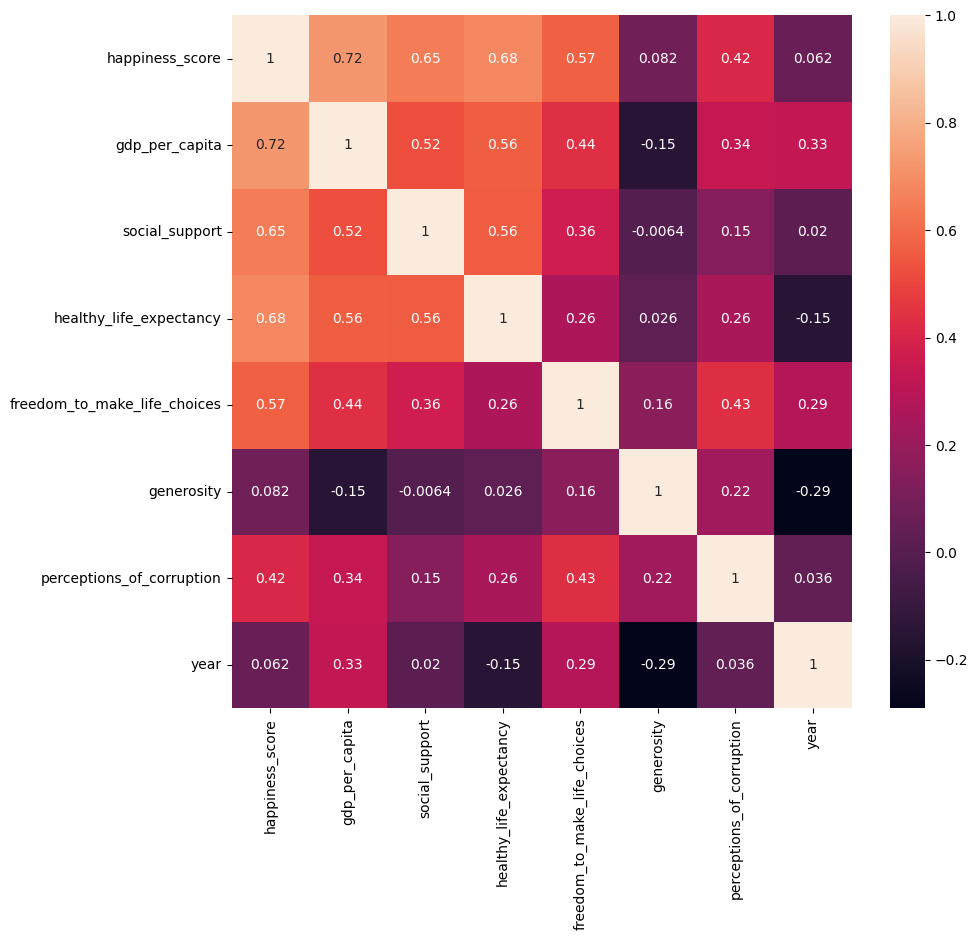

In [ ]:
plt.figure(figsize=(10,9))
sb.heatmap(df.corr(), annot=True)

Text(0.5, 1.0, 'Happiness Score vs GDP per capita')

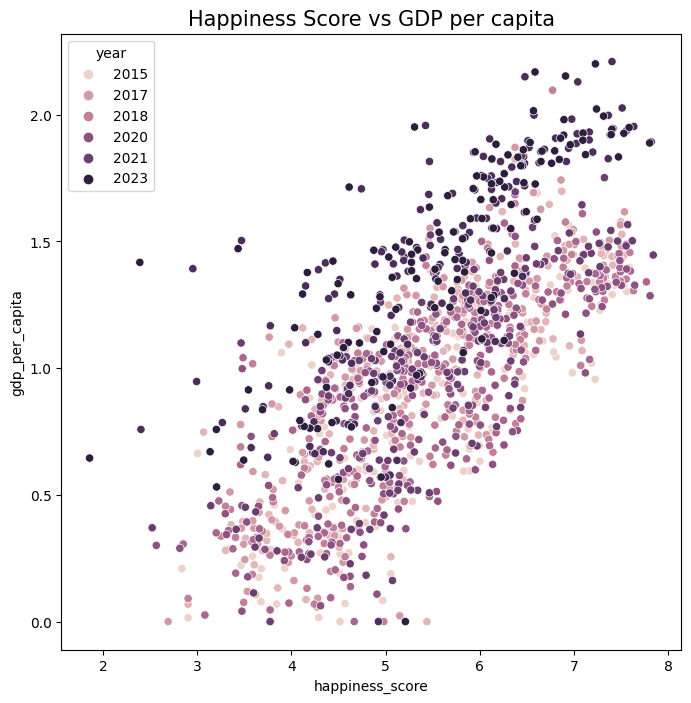

In [ ]:
plt.figure(figsize=(8, 8))
sb.scatterplot(data=df, x='happiness_score', y='gdp_per_capita', hue='year')
plt.title("Happiness Score vs GDP per capita", fontsize=15)

Text(0.5, 1.0, 'gdp_per_capita vs healthy_life_expectancy')

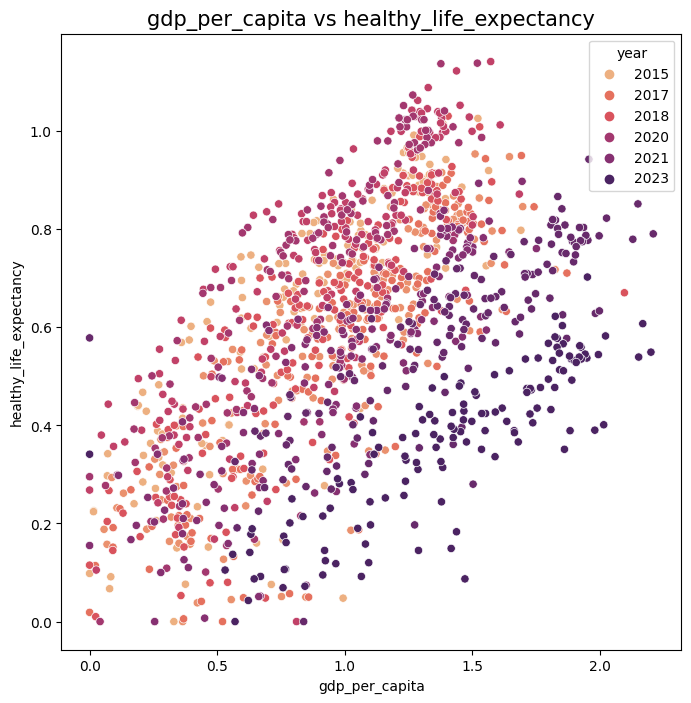

In [ ]:
plt.figure(figsize=(8, 8))
sb.scatterplot(data=df, x='gdp_per_capita', y='healthy_life_expectancy', hue='year', palette=sb.color_palette("flare", as_cmap=True))
plt.title("gdp_per_capita vs healthy_life_expectancy", fontsize=15)

Text(0, 0.5, 'Frequency')

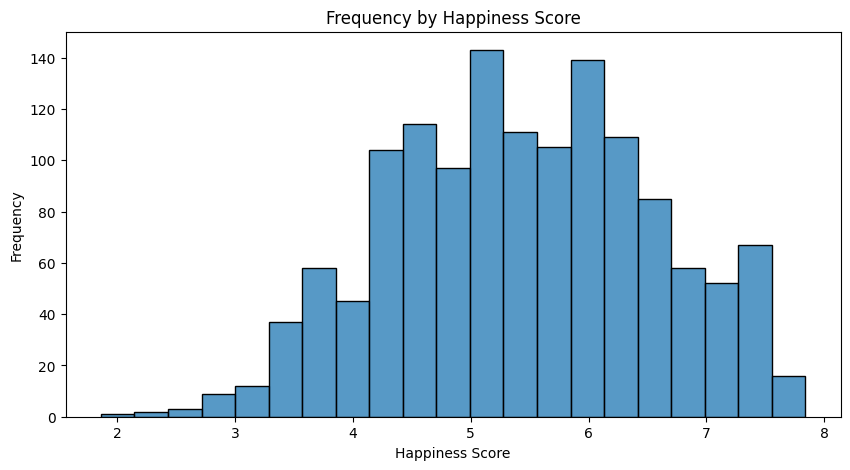

In [ ]:
plt.figure(figsize=(10,5))
sb.histplot(df['happiness_score'])
plt.title('Frequency by Happiness Score')
plt.xlabel('Happiness Score')
plt.ylabel('Frequency')

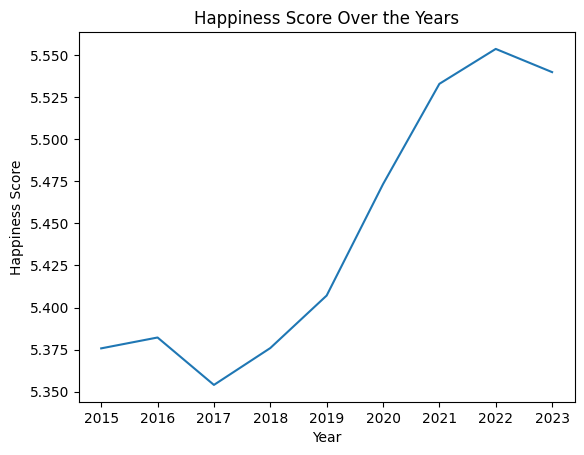

In [ ]:
sb.lineplot(data=df, x='year', y='happiness_score', errorbar=None)
plt.title('Happiness Score Over the Years')
plt.xlabel('Year')
plt.ylabel('Happiness Score')
plt.show()

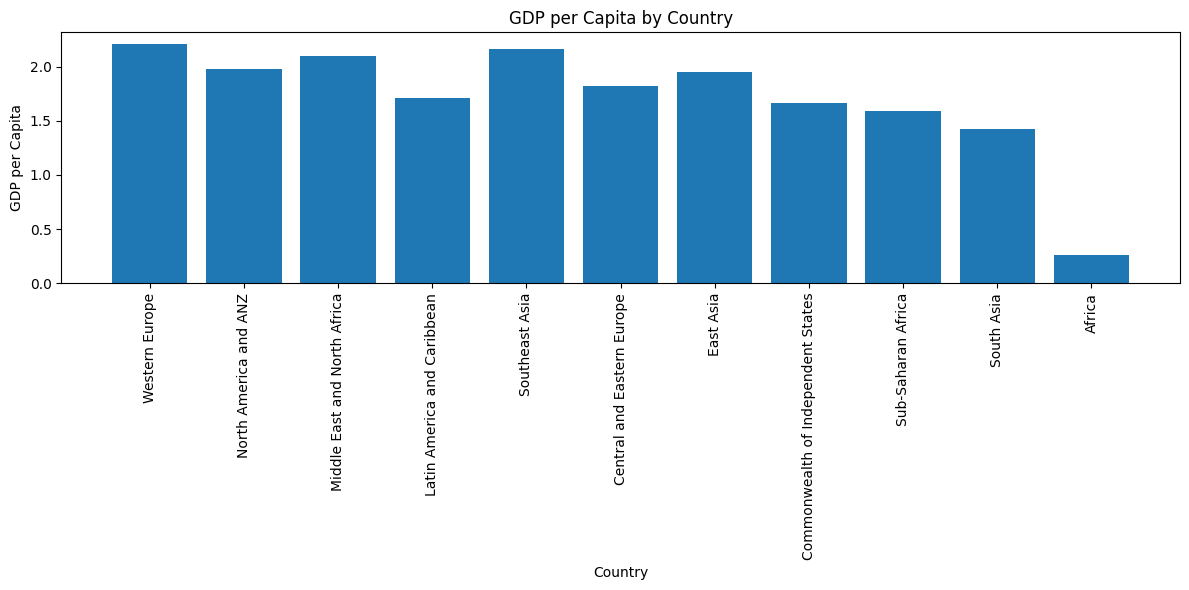

In [ ]:
# Assuming you have a DataFrame named 'df' containing your data
# You can access the 'country' and 'gdp_per_capita' columns like this:
countries = df['region']
gdp_per_capita = df['gdp_per_capita']

# Create a bar chart
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
plt.bar(countries, gdp_per_capita)
plt.xlabel('Country')
plt.ylabel('GDP per Capita')
plt.title('GDP per Capita by Country')
plt.xticks(rotation=90)  # Rotate the country names on the x-axis for better readability

plt.tight_layout()  # Ensure labels are not cut off
plt.show()

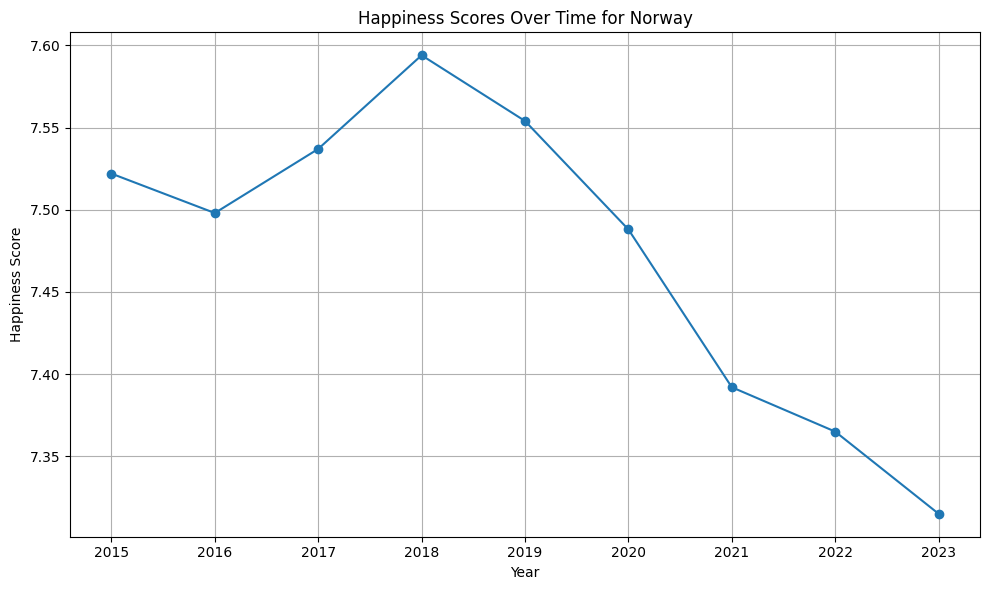

In [ ]:
# Specify the country for analysis
country_to_analyze = 'Norway'

# Filter the DataFrame for the specific country
country_data = df[df['country'] == country_to_analyze]

# Extract the year and happiness_score columns
years = country_data['year']
happiness_scores = country_data['happiness_score']

# Create a time series line plot
plt.figure(figsize=(10, 6))
plt.plot(years, happiness_scores, marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Happiness Score')
plt.title(f'Happiness Scores Over Time for {country_to_analyze}')
plt.grid(True)

plt.tight_layout()
plt.show()

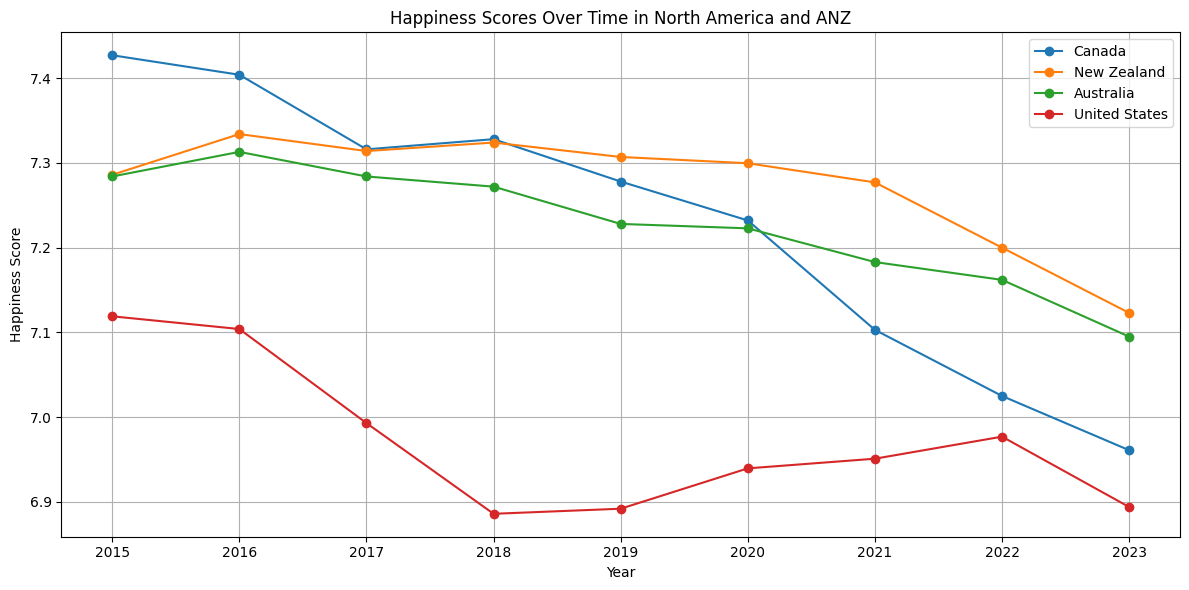

In [ ]:

region_to_analyze = df['region'][4]

# Filter the DataFrame for the specific region
region_data = df[df['region'] == region_to_analyze]

# Get unique countries in the filtered DataFrame
unique_countries = region_data['country'].unique()

# Create a line chart with a line for each country in the region
plt.figure(figsize=(12, 6))
for country in unique_countries:
    # Filter the DataFrame for the specific country
    country_data = region_data[region_data['country'] == country]
    
    # Extract the year and happiness_score columns
    years = country_data['year']
    happiness_scores = country_data['happiness_score']
    
    # Plot the line for the country
    plt.plot(years, happiness_scores, label=country, marker='o', linestyle='-')

plt.xlabel('Year')
plt.ylabel('Happiness Score')
plt.title(f'Happiness Scores Over Time in {region_to_analyze}')
plt.legend(loc='best')  # Add a legend to label the lines with country names
plt.grid(True)

plt.tight_layout()
plt.show()